In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("../Pandas Dataset/insurance_data_codebasics.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


<Axes: xlabel='age', ylabel='bought_insurance'>

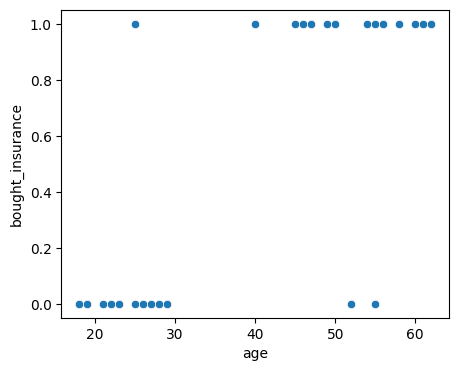

In [4]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="age",y="bought_insurance",data=df)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df[["age"]],df["bought_insurance"],train_size=.75)
x_train

,age
4,46
14,49
10,18
5,56
18,19
20,21
13,29
22,40
16,25
7,60


In [6]:
model=LogisticRegression()

In [7]:
model.fit(x_train,y_train)

LogisticRegression()

In [8]:
x_test

,age
17,58
23,45
15,55
25,54
6,55
0,22
24,50


In [9]:
y_predict=model.predict(x_test)

In [10]:
model.predict_proba(x_test)

array([[0.04665295, 0.95334705],
       [0.2561456 , 0.7438544 ],
       [0.07129407, 0.92870593],
       [0.08189371, 0.91810629],
       [0.07129407, 0.92870593],
       [0.91574762, 0.08425238],
       [0.13984967, 0.86015033]])

In [11]:
model.score(x_test,y_test)

0.8571428571428571

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,y_predict))

print(accuracy_score(y_test,y_predict))

[[1 1]
 [0 5]]
0.8571428571428571


In [13]:
df=pd.read_csv("../Pandas Dataset/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [17]:
def salary_convert(data):
    if(data=="low"):
        return 1
    elif(data=="medium"):
        return 2
    else:
        return 3
    
df["salary"]=df["salary"].apply(salary_convert)

In [18]:
df["salary"]

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int64

In [ ]:
df.drop("Department",axis=1,inplace=True)

In [24]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


<Axes: >

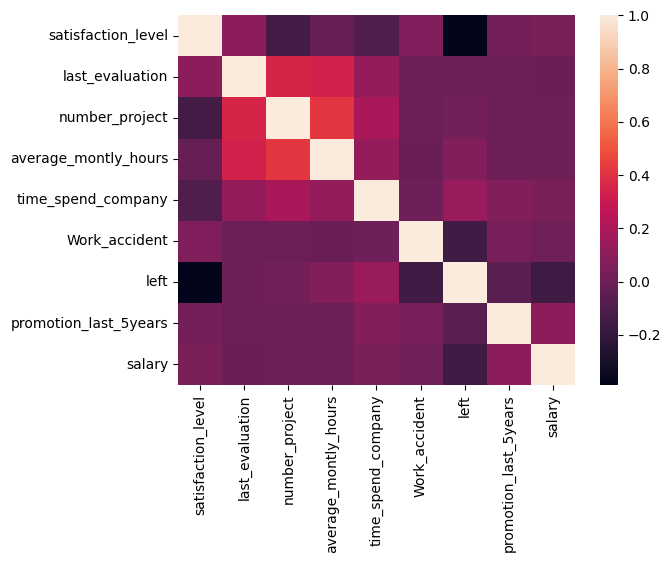

In [25]:
sns.heatmap(df.corr())

<Axes: >

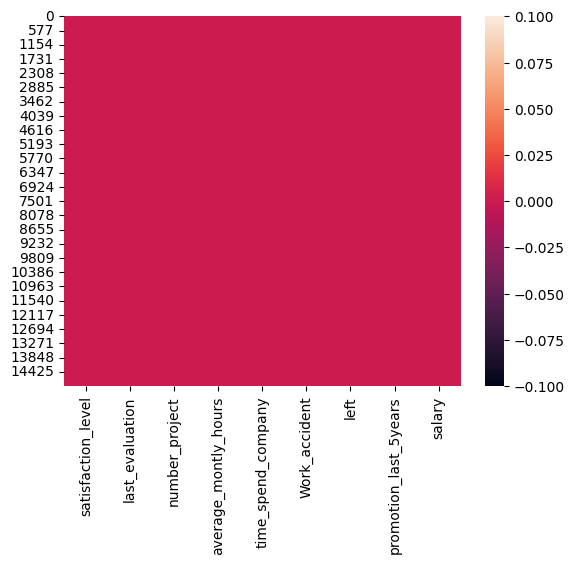

In [31]:
sns.heatmap(df.isnull())

In [34]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary']

In [40]:
x=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours', 'time_spend_company','Work_accident','promotion_last_5years','salary']]
y=df["left"]

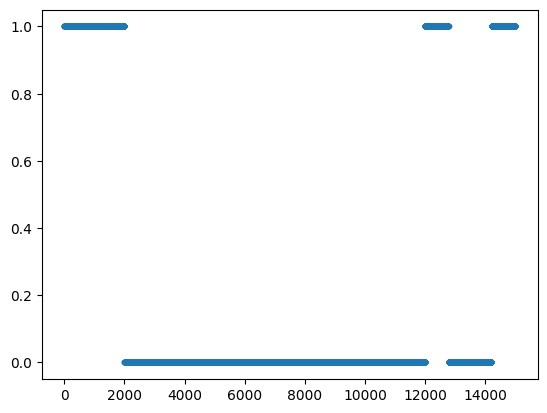

In [52]:
plt.plot(y,".")

In [43]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
x_scaled=scale.fit_transform(x)
x_scaled

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.93336794],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
        -0.14741182,  0.63609235],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
        -0.14741182,  0.63609235],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.93336794],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
        -0.14741182, -0.93336794],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.93336794]])

In [66]:
from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train=train_test_split(x_scaled,y,test_size=.20,random_state=11)

In [67]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [68]:
predicted_y=model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(predicted_y,y_test)

0.7786482206850571

In [70]:
confusion_matrix(y_test,predicted_y)

array([[8400,  735],
       [1921,  943]], dtype=int64)

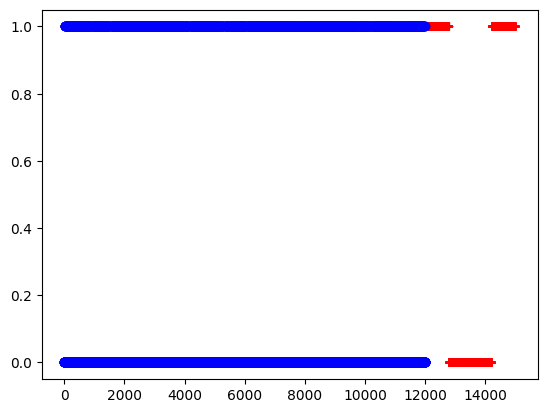

In [71]:
plt.plot(y_test,"r+")
plt.plot(predicted_y,"bo")
